In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/Emotions_2.txt', names=['statement', 'emotion'], sep=';')

In [ ]:
df.head()

,statement,emotion
0,statement,emotion
1,i didnt feel humiliated,sadness
2,i can go from feeling so hopeless to so damned...,sadness
3,im grabbing a minute to post i feel greedy wrong,anger
4,i am ever feeling nostalgic about the fireplac...,love


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16001 entries, 0 to 16000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  16001 non-null  object
 1   emotion    16001 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
# one hot encoding

category = pd.get_dummies(df.emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='emotion')
df_baru

,statement,anger,fear,joy,love,sadness,surprise
0,statement,0,0,0,0,0,0
1,i didnt feel humiliated,0,0,0,0,1,0
2,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
3,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
4,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
...,...,...,...,...,...,...,...
15996,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15997,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15998,i feel strong and good overall,0,0,1,0,0,0
15999,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

pernyataan = df_baru['statement'].values
label = df_baru[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(pernyataan, label, test_size=0.2) # data training sebesat 20%

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# membuat tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih)
tokenizer.fit_on_texts(kalimat_test)

# membuat sekuens
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

# melakukan padding
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=150, input_length=150),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.75):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 90

history = model.fit(
    padded_latih,
    y_latih,
    epochs=num_epochs,
    batch_size = 64,
    validation_data = (padded_test, y_test),
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/90
200/200 - 45s - loss: 1.6276 - accuracy: 0.3154 - val_loss: 1.5650 - val_accuracy: 0.3858
Epoch 2/90
200/200 - 42s - loss: 1.3768 - accuracy: 0.4989 - val_loss: 1.2574 - val_accuracy: 0.5792
Epoch 3/90
200/200 - 42s - loss: 0.9372 - accuracy: 0.6790 - val_loss: 0.7636 - val_accuracy: 0.7648
Epoch 4/90
200/200 - 41s - loss: 0.6010 - accuracy: 0.8130 - val_loss: 0.5556 - val_accuracy: 0.8188
Epoch 5/90
200/200 - 42s - loss: 0.4541 - accuracy: 0.8596 - val_loss: 0.4723 - val_accuracy: 0.8516
Epoch 6/90
200/200 - 42s - loss: 0.3483 - accuracy: 0.8944 - val_loss: 0.4000 - val_accuracy: 0.8732
Epoch 7/90
200/200 - 42s - loss: 0.2717 - accuracy: 0.9113 - val_loss: 0.4385 - val_accuracy: 0.8697

Akurasi telah mencapai >90%!


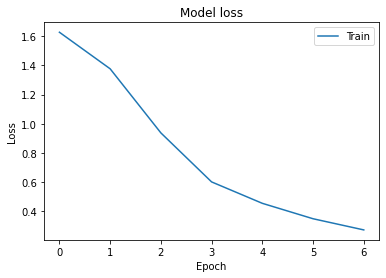

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

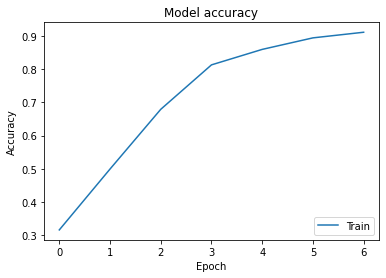

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()